In [33]:
# Import python libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
%matplotlib inline
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

sns.set(style='whitegrid')

# Show versions (for sharing notebook purposes)
import sys
print('Python version:', sys.version)
print('Pandas version:', pd.__version__)
print('Seaborn version:', sns.__version__)

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Pandas version: 2.2.2
Seaborn version: 0.13.2


In [34]:
# Load dataset: 911-End-to-End_Data
df = pd.read_csv('https://raw.githubusercontent.com/angdavis240-lgtm/Python-Projects/refs/heads/main/911_End-to-End_Data.csv')
# View first 5 rows of dataset
print('First 5 rows:')
df.head()
## Research Question: Does average 911 dispatch and travel times differ between NYPD and EMS, and how do incident types vary between the two agencies?

First 5 rows:


,Week Start Date,Agency,Final Incident Type,# of Incidents Calculated,Call to First Pickup,Call to PD Calltaker Handoff,Call to FDNY Pickup,Call to FDNY Job Creation,Call to EMS Pickup,Call to Agency Job Creation,Call to Agency Dispatch,Call to Agency Arrival,Call to First Arrival (Multi-Agency Incidents),Median Pickup,Median Calltaker Handoff,Median FDNY Pickup,Median FDNY Job Creation,Median Ems Pickup,Median Ems Job Creation,Median Dispatch,Median Travel,Median Cumulative First Arrival (Multi-Agency Incidents),Average Travel,Average Dispatch,Average EMS Processing,Average EMS Pickup,Average Calltaker Processing,Average Pickup,Average FD Pickup,Average FD Processing
0,12/22/2025,NYPD (Non-CIP),Dispute,4316,3.32,176.82,NaN,NaN,NaN,NaN,819.43,"3,339.94","3,318.80",3.00,143.00,NaN,NaN,NaN,NaN,187.00,987.00,"1,655.50",42.01,10.71,NaN,NaN,2.89,0.06,NaN,NaN
1,12/22/2025,NYPD (Non-CIP),Vehicle Accident,252,3.37,197.63,NaN,NaN,NaN,NaN,"1,123.10","4,992.53","4,655.24",3.00,177.00,NaN,NaN,NaN,NaN,251.50,"1,660.50","2,265.00",64.49,15.42,NaN,NaN,3.24,0.06,NaN,NaN
2,12/22/2025,NYPD (Non-CIP),Other Crimes (In Progress),2230,3.38,162.94,NaN,NaN,NaN,NaN,567.63,"1,585.64","1,580.84",3.00,134.00,NaN,NaN,NaN,NaN,103.00,435.50,800.00,16.97,6.74,NaN,NaN,2.66,0.06,NaN,NaN
3,12/22/2025,EMS,2. Non-Life Threatening Med Emergencies,10325,3.37,107.17,NaN,NaN,118.16,172.53,"1,138.07","2,043.51","1,850.88",3.00,93.50,NaN,NaN,12.50,38.00,148.00,625.00,925.00,15.09,17.18,0.93,0.23,1.73,0.06,NaN,NaN
4,12/22/2025,FDNY,3. Medical Emergencies,3471,3.28,454.36,NaN,NaN,86.34,443.67,497.25,875.42,755.55,3.00,143.00,NaN,NaN,5.00,62.00,8.00,350.00,525.00,6.30,0.71,4.93,0.11,7.52,0.05,NaN,NaN


In [35]:
# Peak at the last dataset
print('Last 5 rows:')
display(df.tail())
# Shape of the dataset
print('Shape (rows, columns):', df.shape)
# Column names
print('\nColumn Names:', df.columns)
# Info (non-null counts, data types)
print('\nDataFrame Info:')
display(df.info())
# Basic numeric stats
print('\nSummary Statistics (numeric columns):')
display(df.describe())
# Basic categorical stats
print('\nSummary Statistics (categorical columns):')
display(df.describe(include='object'))
# Memory usage (bytes)
print('\nMemory Usage (bytes):')
print(df.memory_usage(deep=True))

Last 5 rows:


,Week Start Date,Agency,Final Incident Type,# of Incidents Calculated,Call to First Pickup,Call to PD Calltaker Handoff,Call to FDNY Pickup,Call to FDNY Job Creation,Call to EMS Pickup,Call to Agency Job Creation,Call to Agency Dispatch,Call to Agency Arrival,Call to First Arrival (Multi-Agency Incidents),Median Pickup,Median Calltaker Handoff,Median FDNY Pickup,Median FDNY Job Creation,Median Ems Pickup,Median Ems Job Creation,Median Dispatch,Median Travel,Median Cumulative First Arrival (Multi-Agency Incidents),Average Travel,Average Dispatch,Average EMS Processing,Average EMS Pickup,Average Calltaker Processing,Average Pickup,Average FD Pickup,Average FD Processing
11601,11/18/2013,NYPD (Non-CIP),Dispute,458,3.07,344.80,NaN,NaN,NaN,NaN,"1,332.47","2,194.41","2,188.39",3.00,335.00,NaN,NaN,NaN,NaN,271.00,540.00,"1,426.00",14.37,16.46,NaN,NaN,5.70,0.05,NaN,NaN
11602,11/18/2013,FDNY,1. Structural Fires,306,3.05,76.31,NaN,NaN,NaN,NaN,89.70,281.30,279.42,3.00,54.00,NaN,NaN,NaN,NaN,10.00,195.00,267.00,3.19,0.22,NaN,NaN,1.22,0.05,NaN,NaN
11603,11/18/2013,NYPD,3. Non-Critical,230,3.13,299.76,NaN,NaN,NaN,NaN,559.69,"1,024.12","1,016.88",3.00,283.50,NaN,NaN,NaN,NaN,127.00,316.00,788.00,7.74,4.33,NaN,NaN,4.94,0.05,NaN,NaN
11604,11/18/2013,NYPD,2. Serious,223,3.30,282.80,NaN,NaN,NaN,NaN,429.46,709.57,687.13,3.00,276.00,NaN,NaN,NaN,NaN,91.00,203.00,600.00,4.67,2.44,NaN,NaN,4.66,0.06,NaN,NaN
11605,11/18/2013,NYPD,1. Critical,130,3.22,265.38,NaN,NaN,NaN,NaN,374.78,681.41,671.46,3.00,257.50,NaN,NaN,NaN,NaN,83.50,150.50,527.00,5.11,1.82,NaN,NaN,4.37,0.05,NaN,NaN


Shape (rows, columns): (11606, 30)

Column Names: Index(['Week Start Date', 'Agency', 'Final Incident Type',
       '# of Incidents Calculated', 'Call to First Pickup',
       'Call to PD Calltaker Handoff', 'Call to FDNY Pickup',
       'Call to FDNY Job Creation', 'Call to EMS Pickup',
       'Call to Agency Job Creation', 'Call to Agency Dispatch',
       'Call to Agency Arrival',
       'Call to First Arrival (Multi-Agency Incidents)', 'Median Pickup',
       'Median Calltaker Handoff', 'Median FDNY Pickup',
       'Median FDNY Job Creation', 'Median Ems Pickup',
       'Median Ems Job Creation', 'Median Dispatch', 'Median Travel',
       'Median Cumulative First Arrival  (Multi-Agency Incidents)',
       'Average Travel', 'Average Dispatch', 'Average EMS Processing',
       'Average EMS Pickup', 'Average Calltaker Processing', 'Average Pickup',
       'Average FD Pickup', 'Average FD Processing'],
      dtype='object')

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIn

None


Summary Statistics (numeric columns):


,# of Incidents Calculated,Call to First Pickup,Call to PD Calltaker Handoff,Call to FDNY Pickup,Call to FDNY Job Creation,Call to EMS Pickup,Call to Agency Job Creation,Call to Agency Dispatch,Call to Agency Arrival,Call to First Arrival (Multi-Agency Incidents),Median Pickup,Median Calltaker Handoff,Median FDNY Pickup,Median FDNY Job Creation,Median Ems Pickup,Median Ems Job Creation,Median Dispatch,Median Travel,Median Cumulative First Arrival (Multi-Agency Incidents),Average Travel,Average Dispatch,Average EMS Processing,Average EMS Pickup,Average Calltaker Processing,Average Pickup,Average FD Pickup,Average FD Processing
count,"11,606.00","11,606.00","11,605.00","1,215.00","1,215.00","1,917.00","1,918.00","11,606.00","11,606.00","11,606.00","11,606.00","11,605.00","1,215.00","1,215.00","1,917.00","1,917.00","11,605.00","11,606.00","11,606.00","11,606.00","11,605.00","1,917.00","1,917.00","11,605.00","11,606.00","1,215.00","1,215.00"
mean,"3,124.25",3.99,143.36,42.67,101.09,84.37,175.89,505.64,"1,740.94","1,626.47",3.05,108.25,5.00,46.29,9.60,46.47,137.66,698.65,"1,017.57",20.59,5.92,1.31,0.13,2.32,0.07,0.09,0.97
std,"3,342.96",1.40,59.72,13.70,47.22,16.93,58.92,355.87,"1,470.95","1,433.82",0.54,45.42,0.00,5.60,4.15,11.93,145.79,653.58,870.74,19.69,5.64,0.70,0.05,1.00,0.02,0.01,0.72
min,1.00,-46.68,-0.84,19.00,50.00,9.31,-44.83,70.00,110.00,110.00,2.00,12.00,5.00,-35.00,5.00,10.00,-950.00,-452.00,110.00,-7.53,-25.92,-1.03,0.07,-0.07,-0.78,0.08,-0.06
25%,411.00,3.41,110.41,34.30,87.34,70.53,142.96,217.25,548.75,498.01,3.00,81.00,5.00,45.00,5.00,39.00,57.00,268.00,405.00,5.22,1.49,0.93,0.09,1.76,0.06,0.08,0.87
50%,"2,391.00",3.71,149.73,37.22,93.40,82.29,163.01,408.43,"1,149.28","1,025.65",3.00,112.00,5.00,47.00,10.50,43.50,106.00,435.25,643.12,11.71,4.24,1.09,0.12,2.42,0.06,0.09,0.91
75%,"3,867.75",4.21,173.10,52.22,110.20,92.05,187.96,753.32,"2,720.89","2,561.51",3.00,139.50,5.00,48.00,13.00,50.00,218.00,992.00,"1,491.00",32.98,9.87,1.74,0.16,2.82,0.07,0.09,0.98
max,"17,613.00",56.08,"1,459.77",185.06,"1,460.82",204.65,788.70,"4,331.00","16,395.00","16,395.00",27.00,711.50,5.00,153.00,21.00,201.00,"4,231.00","14,591.00","16,395.00",243.18,70.52,10.93,0.68,24.27,0.93,0.34,22.15



Summary Statistics (categorical columns):


,Week Start Date,Agency,Final Incident Type
count,11606,11606,11534
unique,632,4,22
top,05/26/2014,NYPD (Non-CIP),Dispute
freq,20,5849,632



Memory Usage (bytes):
Index                                                           132
Week Start Date                                              684754
Agency                                                       672322
Final Incident Type                                          834005
# of Incidents Calculated                                     92848
Call to First Pickup                                          92848
Call to PD Calltaker Handoff                                  92848
Call to FDNY Pickup                                           92848
Call to FDNY Job Creation                                     92848
Call to EMS Pickup                                            92848
Call to Agency Job Creation                                   92848
Call to Agency Dispatch                                       92848
Call to Agency Arrival                                        92848
Call to First Arrival (Multi-Agency Incidents)                92848
Median Pickup            

In [36]:
# Random sampling of 5 rows of the dataset
df.sample(5, random_state=26)

,Week Start Date,Agency,Final Incident Type,# of Incidents Calculated,Call to First Pickup,Call to PD Calltaker Handoff,Call to FDNY Pickup,Call to FDNY Job Creation,Call to EMS Pickup,Call to Agency Job Creation,Call to Agency Dispatch,Call to Agency Arrival,Call to First Arrival (Multi-Agency Incidents),Median Pickup,Median Calltaker Handoff,Median FDNY Pickup,Median FDNY Job Creation,Median Ems Pickup,Median Ems Job Creation,Median Dispatch,Median Travel,Median Cumulative First Arrival (Multi-Agency Incidents),Average Travel,Average Dispatch,Average EMS Processing,Average EMS Pickup,Average Calltaker Processing,Average Pickup,Average FD Pickup,Average FD Processing
1219,09/16/2024,FDNY,1. Structural Fires,233,7.58,35.42,37.96,90.78,NaN,NaN,102.14,303.98,303.98,4.00,17.00,5.00,48.00,NaN,NaN,8.00,200.00,294.00,3.36,0.16,NaN,NaN,0.46,0.13,0.08,0.88
7804,11/06/2017,FDNY,2. Non-Structural Fires,173,3.53,62.14,NaN,NaN,NaN,NaN,77.38,330.95,325.01,3.00,55.00,NaN,NaN,NaN,NaN,10.00,231.00,309.00,4.23,0.25,NaN,NaN,0.98,0.06,NaN,NaN
5939,10/21/2019,FDNY,4. Non-Medical Emergencies,2719,3.97,117.61,51.11,105.81,NaN,NaN,175.96,477.32,440.11,3.00,43.00,5.00,46.00,NaN,NaN,7.00,273.00,392.00,5.02,0.24,NaN,NaN,1.89,0.07,0.08,0.91
1300,08/19/2024,NYPD,3. Non-Critical,839,4.71,172.93,NaN,NaN,NaN,NaN,635.00,"1,712.81","1,695.21",3.00,149.00,NaN,NaN,NaN,NaN,150.00,539.00,987.00,17.96,7.70,NaN,NaN,2.80,0.08,NaN,NaN
10831,08/25/2014,NYPD (Non-CIP),Past Crime,3440,2.99,210.48,NaN,NaN,NaN,NaN,"1,358.64","2,958.58","2,921.93",3.00,174.00,NaN,NaN,NaN,NaN,431.00,946.00,"2,050.00",26.67,19.14,NaN,NaN,3.46,0.05,NaN,NaN


Missing values per column (count):


,0
Week Start Date,0
Agency,0
Final Incident Type,72
# of Incidents Calculated,0
Call to First Pickup,0
Call to PD Calltaker Handoff,1
Call to FDNY Pickup,10391
Call to FDNY Job Creation,10391
Call to EMS Pickup,9689
Call to Agency Job Creation,9688



Percentage of missing values per colum (percentage):


,0
Week Start Date,0.00
Agency,0.00
Final Incident Type,0.62
# of Incidents Calculated,0.00
Call to First Pickup,0.00
Call to PD Calltaker Handoff,0.01
Call to FDNY Pickup,89.53
Call to FDNY Job Creation,89.53
Call to EMS Pickup,83.48
Call to Agency Job Creation,83.47



Columns sorted by missing percentage:


,0
Call to FDNY Job Creation,89.53
Call to FDNY Pickup,89.53
Average FD Pickup,89.53
Average FD Processing,89.53
Median FDNY Job Creation,89.53
Median FDNY Pickup,89.53
Median Ems Job Creation,83.48
Median Ems Pickup,83.48
Average EMS Pickup,83.48
Average EMS Processing,83.48


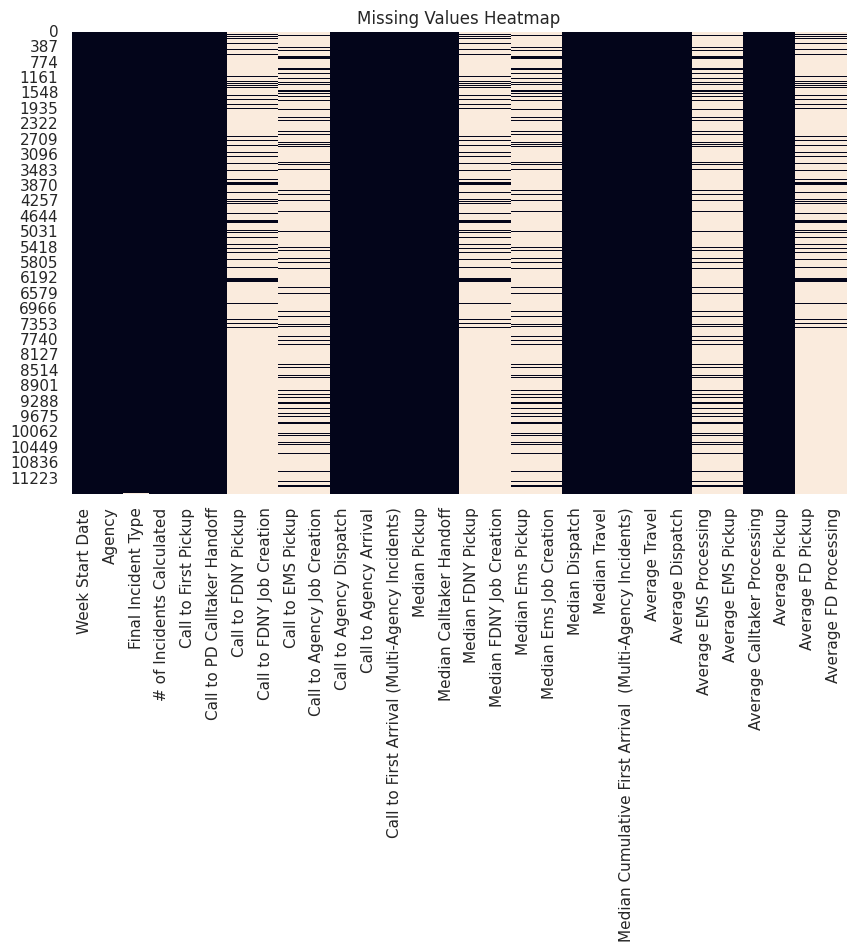


Number of unique values per column:
Week Start Date                                                632
Agency                                                           4
Final Incident Type                                             22
# of Incidents Calculated                                     5421
Call to First Pickup                                           620
Call to PD Calltaker Handoff                                  8253
Call to FDNY Pickup                                            895
Call to FDNY Job Creation                                     1017
Call to EMS Pickup                                            1582
Call to Agency Job Creation                                   1757
Call to Agency Dispatch                                      10715
Call to Agency Arrival                                       11291
Call to First Arrival (Multi-Agency Incidents)               11259
Median Pickup                                                   19
Median Calltaker Handoff 

In [37]:
# Count of missing values
print('Missing values per column (count):')
missing_count = df.isna().sum()
display(missing_count)

# Percentage of missing values
print('\nPercentage of missing values per colum (percentage):')
missing_pct = df.isna().mean()*100
display(missing_pct)

# Table sorted by percentage
print('\nColumns sorted by missing percentage:')
display(missing_pct.sort_values(ascending=False))

# Visual: Missing Values Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

# Display number of unique values per column
print('\nNumber of unique values per column:')
print(df.nunique())

In [38]:
# Number of duplicate rows
num_duplicates = df.duplicated().sum()
print('Number of duplicate rows:', num_duplicates)

# Show duplicate rows (if any)
if num_duplicates > 0:
  print('\nDuplicate rows:')
  display(df[df.duplicated()])
else:
  print('No duplicate rows found.')

Number of duplicate rows: 0
No duplicate rows found.


In [39]:
# Clean column names
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
)
df.columns

Index(['week_start_date', 'agency', 'final_incident_type',
       '#_of_incidents_calculated', 'call_to_first_pickup',
       'call_to_pd_calltaker_handoff', 'call_to_fdny_pickup',
       'call_to_fdny_job_creation', 'call_to_ems_pickup',
       'call_to_agency_job_creation', 'call_to_agency_dispatch',
       'call_to_agency_arrival',
       'call_to_first_arrival_(multi_agency_incidents)', 'median_pickup',
       'median_calltaker_handoff', 'median_fdny_pickup',
       'median_fdny_job_creation', 'median_ems_pickup',
       'median_ems_job_creation', 'median_dispatch', 'median_travel',
       'median_cumulative_first_arrival__(multi_agency_incidents)',
       'average_travel', 'average_dispatch', 'average_ems_processing',
       'average_ems_pickup', 'average_calltaker_processing', 'average_pickup',
       'average_fd_pickup', 'average_fd_processing'],
      dtype='object')

In [40]:
# Inspect week start date column
df['week_start_date'].unique()[:20]

array(['12/22/2025', '12/15/2025', '12/08/2025', '12/01/2025',
       '11/24/2025', '11/17/2025', '11/10/2025', '11/03/2025',
       '10/27/2025', '10/20/2025', '10/13/2025', '10/06/2025',
       '09/29/2025', '09/22/2025', '09/15/2025', '09/08/2025',
       '09/01/2025', '08/25/2025', '08/18/2025', '08/11/2025'],
      dtype=object)

In [41]:
# Convert date to datetime for analysis purposes later.
df['week_start_date'] = pd.to_datetime(df['week_start_date'])
# To check to make sure that the conversion worked.
print(df['week_start_date'])
# I wanted to view the date range to get a better understanding of the data's time span.
print(f"Date Range: {df['week_start_date'].min()} to {df['week_start_date'].max()}")


0       2025-12-22
1       2025-12-22
2       2025-12-22
3       2025-12-22
4       2025-12-22
           ...    
11601   2013-11-18
11602   2013-11-18
11603   2013-11-18
11604   2013-11-18
11605   2013-11-18
Name: week_start_date, Length: 11606, dtype: datetime64[ns]
Date Range: 2013-11-18 00:00:00 to 2025-12-22 00:00:00


In [42]:
#View the number of occurrences of each unique value in the agency column
df['agency'].value_counts()

,count
agency,
NYPD (Non-CIP),5849
FDNY,2575
NYPD,1896
EMS,1286


In [43]:
# Inspect final incident type column
df['final_incident_type'].unique()[:20]

array(['Dispute', 'Vehicle Accident', 'Other Crimes (In Progress)',
       '2. Non-Life Threatening Med Emergencies',
       '3. Medical Emergencies', 'Disorderly Person/Group/Noise',
       '2. Non-Structural Fires', '2. Serious', 'Alarms',
       '1. Life Threating Med Emergencies', '4. Non-Medical Emergencies',
       'Possible Crimes', '1. Structural Fires', '1. Critical',
       '3. Non-Critical',
       'Hazardous Materials/Suspicious Letters/Packages/Substances/Substances',
       'Past Crime', 'Police Officer/Security Holding Suspect',
       'Investigate/Possible Crime', 'Disorderly'], dtype=object)

In [44]:
# Clean the final incident type column
df['final_incident_type']= (
    df['final_incident_type']
    .str.strip()
    .str.lower()
    .str.replace(r'\s+', ' ', regex=True) # Replaces multiple spaces with single space
    .str.replace(r'^\d+\.\s*', '', regex=True) # Removing the numbering
    .str.replace('threating', 'threatening') # Fixing typo
    .str.replace('hazardous materials/suspicious letters/packages/substances/substances', 'hazardous materials') #shortened names for readability
    .str.replace('disorderly person/group/noise', 'disorderly conduct')
    .str.replace('police officer/security holding suspect', 'suspect in custody')
    .str.strip()
)
#Check to verify that the column is correctly cleaned
print(df['final_incident_type'].value_counts())


final_incident_type
dispute                                                       632
vehicle accident                                              632
other crimes (in progress)                                    632
non-life threatening med emergencies                          632
medical emergencies                                           632
disorderly conduct                                            632
serious                                                       632
alarms                                                        632
life threatening med emergencies                              632
non-medical emergencies                                       632
structural fires                                              632
possible crimes                                               632
critical                                                      632
non-critical                                                  632
past crime                                              

In [45]:
# Checking the amount of null values in final incident type
print(df['final_incident_type'].isnull().sum())

72


In [46]:
# Checking the amount of null values in average travel column
print(df['average_travel'].isnull().sum())

0


In [47]:
# Checking the amount of null values in average dispatch column
print(df['average_dispatch'].isnull().sum())

1


In [48]:
# Dropping rows from columns: final incident type and average dispatch
before = len(df)
df = df.dropna(subset=['final_incident_type', 'average_dispatch'])
after = len(df)
# Displays confirmation that 72 rows were dropped. Justification: This was done because I wanted to prevent confusion later on.
print(f"Rows Before: {before:,}")
print(f"Rows After: {after:,}")

Rows Before: 11,606
Rows After: 11,534


In [49]:
# used a for loop to convert the displayed columns that were listed as object data type to the category data type.
categorical_cols = [
    'agency','final_incident_type'
]

for col in categorical_cols:
    df[col] = df[col].astype('category')

df[categorical_cols].dtypes

,0
agency,category
final_incident_type,category


In [50]:
# Identifying Numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print('Numeric columns:', num_cols)

Numeric columns: ['#_of_incidents_calculated', 'call_to_first_pickup', 'call_to_pd_calltaker_handoff', 'call_to_fdny_pickup', 'call_to_fdny_job_creation', 'call_to_ems_pickup', 'call_to_agency_job_creation', 'call_to_agency_dispatch', 'call_to_agency_arrival', 'call_to_first_arrival_(multi_agency_incidents)', 'median_pickup', 'median_calltaker_handoff', 'median_fdny_pickup', 'median_fdny_job_creation', 'median_ems_pickup', 'median_ems_job_creation', 'median_dispatch', 'median_travel', 'median_cumulative_first_arrival__(multi_agency_incidents)', 'average_travel', 'average_dispatch', 'average_ems_processing', 'average_ems_pickup', 'average_calltaker_processing', 'average_pickup', 'average_fd_pickup', 'average_fd_processing']


In [51]:
#Checking to make sure that the for loop worked.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11534 entries, 0 to 11605
Data columns (total 30 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   week_start_date                                            11534 non-null  datetime64[ns]
 1   agency                                                     11534 non-null  category      
 2   final_incident_type                                        11534 non-null  category      
 3   #_of_incidents_calculated                                  11534 non-null  int64         
 4   call_to_first_pickup                                       11534 non-null  float64       
 5   call_to_pd_calltaker_handoff                               11534 non-null  float64       
 6   call_to_fdny_pickup                                        1215 non-null   float64       
 7   call_to_fdny_job_creation           

In [52]:
# Made a dataframe with only NYPD and EMS. Justification: for clarification on which agencies I'm focusing on
agency_df = df[df['agency'].isin(['NYPD', 'EMS'])].copy()

In [53]:
# Made a new and clean dataframe with the columns that I'm going to be using for analysis.
cols_for_analysis = [
    'week_start_date', 'agency', 'final_incident_type','average_travel', 'average_dispatch'
    ]
cleaned_df = agency_df.loc[:, cols_for_analysis].copy()
# Checking new dataframe/ overview of new dataframe.
cleaned_df.info()
cleaned_df.describe()
cleaned_df.head()
cleaned_df['agency'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 3160 entries, 3 to 11605
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   week_start_date      3160 non-null   datetime64[ns]
 1   agency               3160 non-null   category      
 2   final_incident_type  3160 non-null   category      
 3   average_travel       3160 non-null   float64       
 4   average_dispatch     3160 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(2)
memory usage: 105.8 KB


,count
agency,
NYPD,1896
EMS,1264
FDNY,0
NYPD (Non-CIP),0


In [54]:
# Convert seconds to minutes for readability
cleaned_df['avg_travel_mins'] = cleaned_df['average_travel'] / 60
cleaned_df['avg_dispatch_mins'] = cleaned_df['average_dispatch'] / 60


In [55]:
# Descriptive statistics: Average travel (mins) by Agency
cleaned_df.groupby('agency')['avg_travel_mins'].describe()

/tmp/ipython-input-3527245981.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cleaned_df.groupby('agency')['avg_travel_mins'].describe()


,count,mean,std,min,25%,50%,75%,max
agency,,,,,,,,
EMS,"1,264.00",0.14,0.03,0.09,0.11,0.13,0.16,0.29
FDNY,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NYPD,"1,896.00",0.13,0.08,0.04,0.07,0.10,0.17,0.38
NYPD (Non-CIP),0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Descriptive statistics: Average dispatch (mins) by Agency
cleaned_df.groupby('agency')['avg_dispatch_mins'].describe()

/tmp/ipython-input-4165022841.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cleaned_df.groupby('agency')['avg_dispatch_mins'].describe()


,count,mean,std,min,25%,50%,75%,max
agency,,,,,,,,
EMS,"1,264.00",0.05,0.04,0.02,0.03,0.03,0.05,0.49
FDNY,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NYPD,"1,896.00",0.05,0.03,0.02,0.03,0.04,0.07,0.28
NYPD (Non-CIP),0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


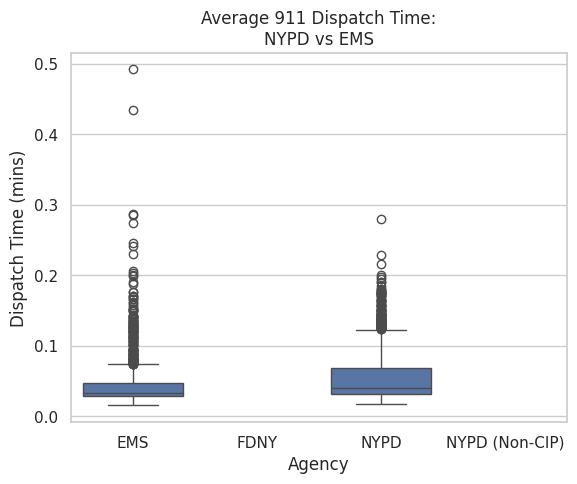

In [57]:
# Visualization: Average 911 Dispatch Time: NYPD vs EMS
#This shows that EMS is showing shorter average dispatch times than NYPD.
sns.boxplot(data= cleaned_df, x='agency', y='avg_dispatch_mins')
plt.title('Average 911 Dispatch Time:\nNYPD vs EMS')
plt.ylabel('Dispatch Time (mins)')
plt.xlabel('Agency')
plt.show()

In [58]:
# Separating the data by agency of focus NYPD and EMS
nypd_travel = cleaned_df.loc[cleaned_df['agency'] == 'NYPD', 'avg_travel_mins']
ems_travel = cleaned_df.loc[cleaned_df['agency'] == 'EMS', 'avg_travel_mins']

In [59]:
# Inferential statistics: T-test
# This is showing the difference in the mean travel times, displaying that EMS has a slightly higher average travel times than NYPD.
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(
    nypd_travel,
    ems_travel,
    equal_var=False
)

t_stat, p_value

cleaned_df.groupby('agency')['avg_travel_mins'].mean()

/tmp/ipython-input-557382356.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cleaned_df.groupby('agency')['avg_travel_mins'].mean()


,avg_travel_mins
agency,
EMS,0.14
FDNY,NaN
NYPD,0.13
NYPD (Non-CIP),NaN


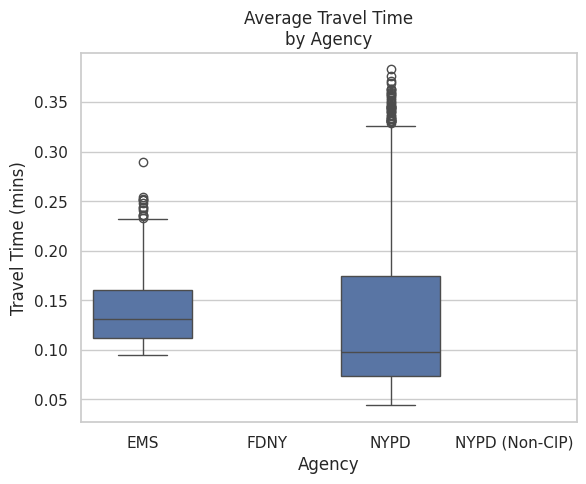

In [60]:
# T-Test Visualization: Average Travel Time by Agency comparing the average travel times between EMS and NYPD.
# EMS has a higher median than NYPD's which shows that EMS has a longer travel time than NYPD.
sns.boxplot(data=cleaned_df, x='agency', y='avg_travel_mins')
plt.title('Average Travel Time\nby Agency')
plt.ylabel('Travel Time (mins)')
plt.xlabel('Agency')
plt.show()

In [61]:
# Inspecting the amount of occurrences of each final incident type to assist with the interpretation of the visualization.
cleaned_df['final_incident_type'].value_counts()

,count
final_incident_type,
critical,632
life threatening med emergencies,632
serious,632
non-life threatening med emergencies,632
non-critical,632
alarms,0
hazardous materials,0
dispute,0
disorderly conduct,0


/tmp/ipython-input-771478659.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['final_incident_type', 'agency'])


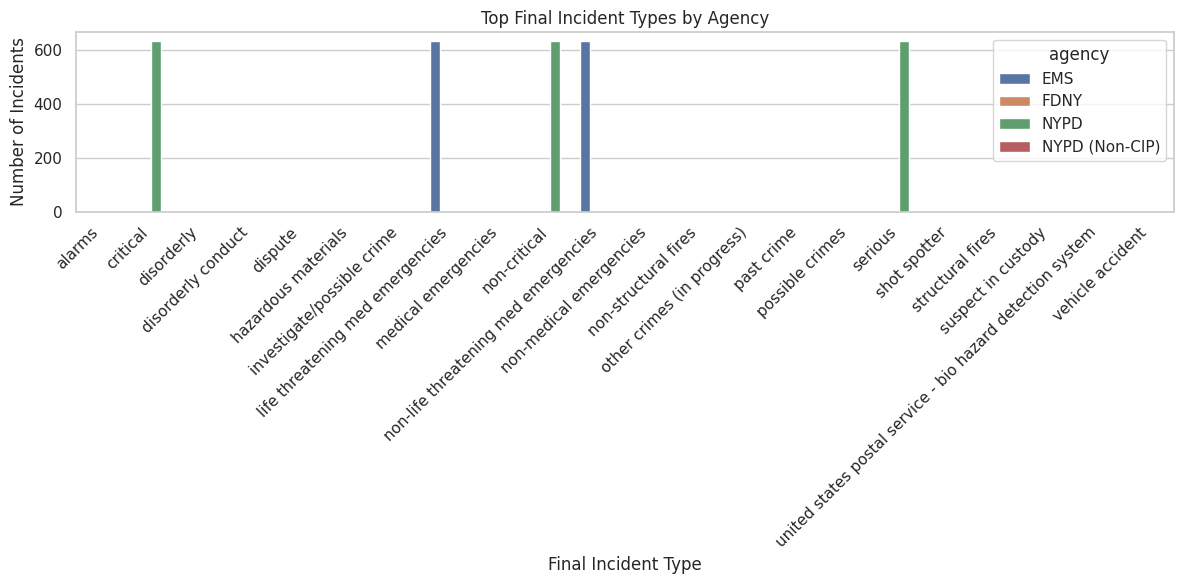

In [62]:
# Visualization: Top 5 Incident Types by Agency
top_incidents = (
    cleaned_df['final_incident_type']
    .value_counts()
    .head()
    .index
)
incident_counts = (
    cleaned_df[cleaned_df['final_incident_type'].isin(top_incidents)]
    .groupby(['final_incident_type', 'agency'])
    .size()
    .reset_index(name='count')
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=incident_counts,
    x='final_incident_type',
    y='count',
    hue='agency'
)
plt.title('Top Final Incident Types by Agency')
plt.xlabel('Final Incident Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

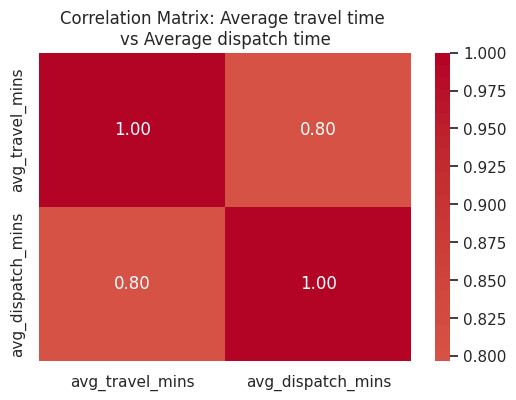

In [63]:
# New df that has numeric columns for correlation
corr_df = cleaned_df[
    ['avg_travel_mins', 'avg_dispatch_mins']
]
corr_df
# Correlation matrix
corr_matrix = corr_df.corr()
corr_matrix
#Correlation matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0
)
plt.title('Correlation Matrix: Average travel time \nvs Average dispatch time')
plt.show()

In [64]:
# Save the cleaned dataset to new CSV file
output_file = 'https://raw.githubusercontent.com/angdavis240-lgtm/Python-Projects/refs/heads/main/911_End-to-End_Data.csv'
df.to_csv(output_file, index=False)
print(f'Cleaned data saved to: {output_file}')

Cleaned data saved to: https://raw.githubusercontent.com/angdavis240-lgtm/Python-Projects/refs/heads/main/911_End-to-End_Data.csv


Conclusion:
My analysis compared EMS and NYPD's 911 response performance using dispatch and travel times and incident type distributions. EMS showed shorter average dispatch times than NYPD. EMS has a longer travel time than NYPD which is also confirmed by the T-test. Incident type analysis showed specific operational roles between EMS and NYPD, which confirms and influences the response time differences.

